# Efectos de filtrado

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import wave
import os.path as os
from scipy.fftpack import fft, ifft
from scipy.signal import filtfilt, butter, stft, bartlett
from scipy.integrate import simps #Usando la regla de Simpson para calcular el área bajo la curva

In [2]:
carpeta = os.abspath('/Users/dianavazquez/Documents/PP_Diana/Datos/') #localización del 
#archivo en tu computadora
datos = pd.read_csv(carpeta +'/H24_OC_OA.csv') #creación de un dataframe
#al que únicamente debes modificar el nombre del archivo con su extensión
datos #comando para presentar el dataframe

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,4339.49,4521.03,4187.69,4627.69,4339.49,4112.31,4348.72,4252.31,4932.82,4447.69,4475.38,4738.46,4420.51,4598.46
1,4346.67,4527.18,4202.05,4633.85,4342.05,4122.05,4366.67,4267.69,4949.74,4465.64,4485.64,4749.74,4432.82,4611.28
2,4350.26,4540.00,4207.18,4643.08,4341.54,4122.05,4374.87,4271.28,4954.36,4462.56,4485.13,4747.18,4430.77,4612.31
3,4337.95,4530.77,4198.46,4638.46,4336.92,4118.97,4372.31,4258.97,4936.92,4441.03,4472.31,4734.87,4413.85,4598.46
4,4334.87,4519.49,4189.23,4629.23,4342.05,4118.97,4369.74,4245.64,4923.08,4436.41,4471.28,4731.79,4416.41,4596.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23122,4414.87,4522.05,4201.54,4683.08,4384.62,4105.64,4361.54,4217.44,4892.82,4362.05,4493.85,4757.44,4426.67,4627.18
23123,4413.85,4524.10,4200.51,4685.64,4388.72,4106.15,4349.74,4196.92,4875.90,4346.67,4476.92,4749.74,4412.82,4614.36
23124,4416.41,4523.08,4204.62,4690.26,4391.28,4102.05,4337.44,4183.59,4875.90,4349.74,4477.95,4752.82,4412.31,4616.41
23125,4413.85,4520.51,4205.13,4687.69,4383.08,4094.36,4336.41,4183.59,4875.90,4352.31,4485.64,4753.33,4413.33,4617.95


In [3]:
fm=128 #frecuencia de muestreo
ti=0 #tiempo de inicio, debe ser número entero
tf=10#tiempo final, debe ser número entero
pt=(tf-ti)*fm#numero de puntos
t1=ti*fm #nos ayuda a dar la posición de la fila para el tiempo inicial
t2=tf*fm #nos ayuda a dar la posición de la fila para el tiempo final
nombres=list(datos) #almacena los nombres de los encabezados en una lista
t=np.linspace(ti,tf,pt)
nc=7 #numero de canal

In [4]:
aaa=[]
for i in range (0,14):
    al=np.array(datos)[t1:t2,i]
    nyq = 128*0.5 #frecuencia de muestreo y ripple
    low = 2 / nyq #bandwith inferior
    high = 45 / nyq #bandwith superior
    b, a = butter(5, [low, high], btype='band')
    env = filtfilt(b, a, al)
    aaa.append(env)
tmp=pd.DataFrame(aaa, nombres)
datosfilt_gaby=tmp.transpose()
datosfilt_gaby

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,-0.661021,-0.573951,-7.461084,-0.733479,-0.537200,-0.201892,0.129394,1.574238,0.370044,0.689013,-0.048961,-0.249294,-0.687617,-0.371391
1,7.133721,6.406329,6.745429,5.267759,2.669582,10.104725,17.506465,18.219829,18.375933,20.282426,11.215436,12.255393,12.640057,13.043478
2,7.499415,15.823866,10.854421,12.350395,0.655425,10.232674,25.162148,21.553444,22.251940,17.052776,8.764815,9.202542,7.174566,11.854657
3,-2.583810,8.744230,2.322482,8.192437,-2.520840,8.249315,22.367531,11.142803,6.296778,-2.367235,-2.250903,-1.239385,-7.458513,-0.667066
4,-7.484209,-3.569430,-7.057201,-2.028795,1.993742,7.993675,18.578011,-1.974151,-7.037154,-6.197838,-3.379987,-4.000839,-5.457122,-3.043784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,-7.477643,-4.092007,-7.709642,-8.397680,2.063665,3.797403,7.805867,52.151550,38.102544,18.895059,-6.001655,-8.609982,0.236258,0.848526
1276,-11.624404,-12.081102,-15.904842,-8.590946,-0.103571,3.885277,9.113840,49.189743,34.515933,9.874302,-7.811892,-11.361194,-6.321651,-8.095136
1277,-14.245247,-10.431010,-16.353683,-9.742548,-4.741115,-0.401778,3.845514,37.730156,28.213099,11.985152,-11.699181,-12.077382,-10.945507,-10.050321
1278,-7.275281,1.802278,-8.212957,-5.030411,-4.392418,-0.933175,-3.261952,20.032266,19.363328,16.829805,-8.320422,-7.900999,-4.477783,-1.749324


In [5]:
bbb=[]
for j in range (0,14):
    bb=np.array(datos)[t1:t2,j]
    nyq = 128*0.5 #frecuencia de muestreo y ripple
    high = 0.1 / nyq #bandwith superior
    b, a = butter(5, [high], btype='high')
    env_fi = filtfilt(b, a, bb)
    bbb.append(env_fi)
tmp=pd.DataFrame(bbb, nombres)
datosfilt_fi=tmp.transpose()
datosfilt_fi

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,-13.139383,8.676042,89.719228,-9.886088,-6.962975,12.106423,-5.056359,16.499233,20.316839,-5.897453,7.178349,-2.855969,22.070267,8.014679
1,-6.008676,14.853119,104.247617,-3.795970,-4.445199,21.917002,12.843848,31.990128,37.325130,12.172132,17.442272,8.480036,34.431658,20.857588
2,-2.467983,27.700247,109.545237,5.364089,-4.997505,21.987616,20.994030,35.691155,42.033539,9.212163,16.936145,5.976008,32.433030,21.910452
3,-14.827305,18.497424,100.992084,0.674089,-9.659892,18.978264,18.384187,23.492315,24.682064,-12.197359,4.119968,-6.278055,15.564385,8.083271
4,-17.956640,7.244650,91.928154,-8.625970,-4.572360,19.048946,15.764321,10.273606,10.930705,-16.696434,3.093739,-9.302154,18.175720,6.056043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,-15.953070,-23.096768,-3.997397,-21.352313,-5.863148,-4.474358,6.240741,81.248370,52.613876,33.239705,-12.145092,-16.393529,-5.339459,-12.477555
1276,-20.304811,-30.912841,-12.804453,-20.487408,-7.563369,-4.101191,7.733642,76.656759,48.186728,20.981059,-14.195935,-18.957552,-12.413877,-21.263175
1277,-23.118923,-28.480099,-13.404596,-23.204026,-11.315056,-7.828875,4.096187,65.412799,42.224460,27.186909,-18.817371,-21.002170,-16.918524,-23.380592
1278,-15.175417,-15.788550,-5.807849,-16.182173,-10.448216,-6.937416,-3.131623,44.936524,31.657091,27.247278,-15.229405,-16.377388,-10.663405,-14.739819


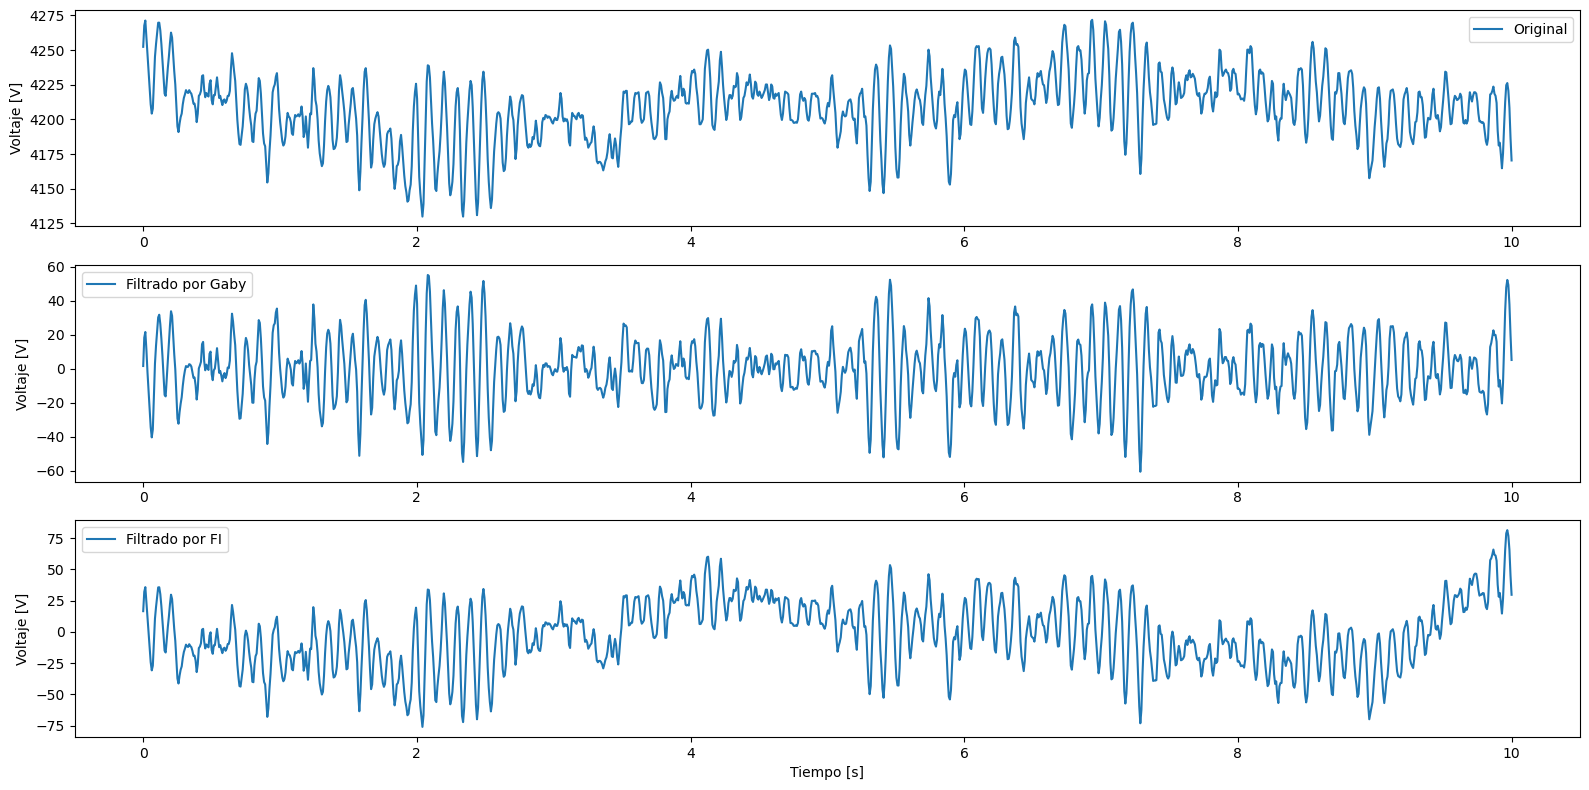

In [6]:
volt=np.array(datos)[t1:t2,nc]
volt_gaby=np.array(datosfilt_gaby)[t1:t2,nc]
volt_fi=np.array(datosfilt_fi)[t1:t2,nc]
figure, axis = plt.subplots(3, 1, figsize=(16, 8))
# Graficar voltaje original
axis[0].plot(t[t1:t2], volt, label="Original")
axis[0].set_ylabel("Voltaje [V]")
axis[0].legend()

# Graficar voltaje filtrado por Gaby
axis[1].plot(t[t1:t2], volt_gaby, label="Filtrado por Gaby")
axis[1].set_ylabel("Voltaje [V]")
axis[1].legend()

# Graficar voltaje filtrado por FI
axis[2].plot(t[t1:t2], volt_fi, label="Filtrado por FI")
axis[2].set_ylabel("Voltaje [V]")
axis[2].set_xlabel("Tiempo [s]")
axis[2].legend()

# Ajustar la visualización
plt.tight_layout()

# Mostrar la gráfica
plt.show()